In [45]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-sep-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-sep-2022/train.csv
/kaggle/input/tabular-playground-series-sep-2022/test.csv


In [46]:
df = pd.read_csv("/kaggle/input/tabular-playground-series-sep-2022/train.csv")

In [47]:
df=df.iloc[:,[1,2,3,4,5]]
df.sample(4)

,date,country,store,product,num_sold
30935,2018-10-07,Germany,KaggleRama,Kaggle for Kids: One Smart Goose,215
6245,2017-05-11,Belgium,KaggleRama,Kaggle Getting Started,91
1623,2017-02-03,Poland,KaggleRama,Kaggle for Kids: One Smart Goose,47
23458,2018-05-04,Poland,KaggleMart,Kaggle Recipe Book,86


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      70128 non-null  object
 1   country   70128 non-null  object
 2   store     70128 non-null  object
 3   product   70128 non-null  object
 4   num_sold  70128 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.7+ MB


In [49]:
df.date= pd.DatetimeIndex(df.date)

In [50]:
df.head(2)

,date,country,store,product,num_sold
0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615


In [51]:
df.country.value_counts()

Belgium    11688
France     11688
Germany    11688
Italy      11688
Poland     11688
Spain      11688
Name: country, dtype: int64

In [52]:
df.store.value_counts()

KaggleMart    35064
KaggleRama    35064
Name: store, dtype: int64

In [53]:
df["product"].value_counts()

Kaggle Advanced Techniques          17532
Kaggle Getting Started              17532
Kaggle Recipe Book                  17532
Kaggle for Kids: One Smart Goose    17532
Name: product, dtype: int64

<AxesSubplot:>

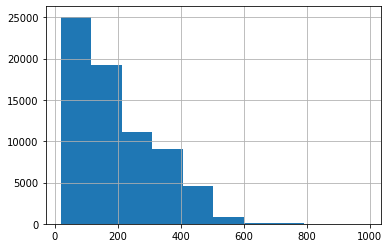

In [54]:
df.num_sold.hist()

In [55]:
#df=df.set_index("date")

<AxesSubplot:>

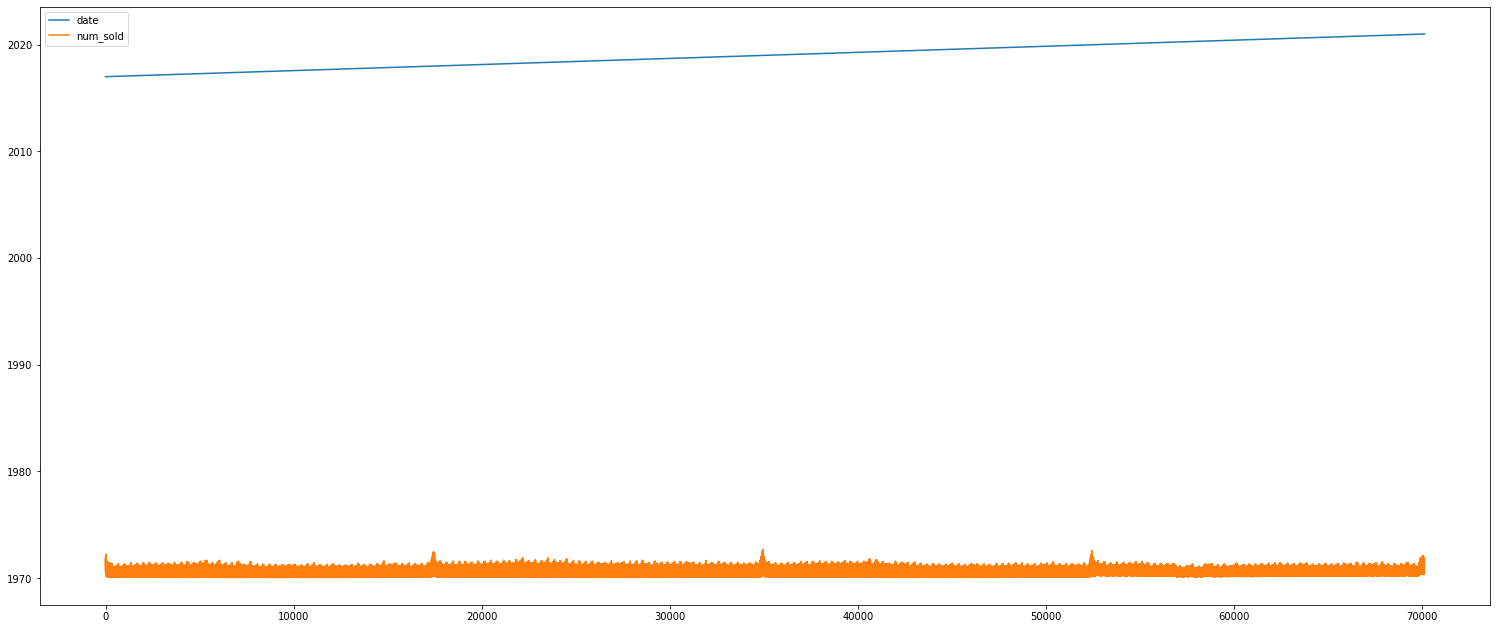

In [56]:
df.plot(kind="line",figsize=(26,11))

In [57]:
df.shape

(70128, 5)

In [58]:
x = df.iloc[:,[0,1,2,3]]
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
final = ohe.fit_transform(x.iloc[:,[1,2,3]])
final = pd.DataFrame(final.toarray())
final

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
70123,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
70124,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
70125,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
70126,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [59]:
df

,date,country,store,product,num_sold
0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240
...,...,...,...,...,...
70123,2020-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,614
70124,2020-12-31,Spain,KaggleRama,Kaggle Advanced Techniques,215
70125,2020-12-31,Spain,KaggleRama,Kaggle Getting Started,158
70126,2020-12-31,Spain,KaggleRama,Kaggle Recipe Book,135


In [60]:
final['Day'] = pd.DatetimeIndex(df['date']).day
final['Month'] = pd.DatetimeIndex(df['date']).month
final['Year'] = pd.DatetimeIndex(df['date']).year
final['quarter'] = df['date'].dt.quarter
final['dayofweek'] = df['date'].dt.dayofweek
final['is_weekend'] = np.where((final['dayofweek'] == 5) | (final['dayofweek'] == 6), 1, 0)

In [61]:
final

,0,1,2,3,4,5,6,7,8,9,10,11,Day,Month,Year,quarter,dayofweek,is_weekend
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1,1,2017,1,6,1
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,1,2017,1,6,1
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,1,2017,1,6,1
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,1,2017,1,6,1
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1,1,2017,1,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70123,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,31,12,2020,4,3,0
70124,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,31,12,2020,4,3,0
70125,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,31,12,2020,4,3,0
70126,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,31,12,2020,4,3,0


In [62]:
y = df.iloc[:,4]

In [63]:
dd = pd.read_csv("/kaggle/input/tabular-playground-series-sep-2022/test.csv")

In [64]:
final2 = pd.DataFrame(ohe.fit_transform(dd.iloc[:,[2,3,4]]).toarray())

In [65]:
final2['Day'] = pd.DatetimeIndex(dd['date']).day
final2['Month'] = pd.DatetimeIndex(dd['date']).month
final2['Year'] = pd.DatetimeIndex(dd['date']).year
final2['quarter'] = df['date'].dt.quarter
final2['dayofweek'] = df['date'].dt.dayofweek
final2['is_weekend'] = np.where((final2['dayofweek'] == 5) | (final2['dayofweek'] == 6), 1, 0)

In [66]:
final2

,0,1,2,3,4,5,6,7,8,9,10,11,Day,Month,Year,quarter,dayofweek,is_weekend
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1,1,2021,1,6,1
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,1,2021,1,6,1
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,1,2021,1,6,1
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,1,2021,1,6,1
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1,1,2021,1,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,31,12,2021,4,6,1
17516,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,31,12,2021,4,6,1
17517,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,31,12,2021,4,6,1
17518,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,31,12,2021,4,6,1


In [67]:
ss = pd.read_csv("/kaggle/input/tabular-playground-series-sep-2022/sample_submission.csv")
ss

,row_id,num_sold
0,70128,100
1,70129,100
2,70130,100
3,70131,100
4,70132,100
...,...,...
17515,87643,100
17516,87644,100
17517,87645,100
17518,87646,100


In [68]:
from sklearn.tree import DecisionTreeRegressor

In [69]:
model = DecisionTreeRegressor()

In [70]:
model.fit(final,y)

DecisionTreeRegressor()

In [71]:
red = model.predict(final2)

In [72]:
red = [int(p) for p in red]
submit = pd.DataFrame({"row_id":ss.row_id,"num_sold":red})
submit.to_csv("SubmissionDTR.csv",index=False)

In [ ]:
from sklearn.model_selection import GridSearchCV

model2 = DecisionTreeRegressor()
parameters={"splitter":["best","random"],
            "max_depth" : [5,9,11,12,15,25,45,100,200],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
clf = GridSearchCV(model2,parameters, cv=5,verbose=3)
clf.fit(final, y)

Fitting 5 folds for each of 64800 candidates, totalling 324000 fits
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=0.597, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=0.652, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=0.640, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, sp

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=0.679, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=0.781, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random, score=0.585, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=random, score=0.644, total=   0.0s
[CV] max_depth=5, m

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.7, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_fea

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.1, splitter=best, score=0.597, total=   0.1s
[CV] max_depth=5, max_f

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best, score=0.597, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best, score=0.652, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best, score=0.640, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best, score=0.679, total=   0.1s
[CV] max_depth=5, max_featu

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_featu

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.7, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.7, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.7, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.8, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.8, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_feature

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=4, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_featu

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=au

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best, score=0.597, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best, score=0.652, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best, score=0.640, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best, score=0.679, total=   0.1s
[CV] max_depth=5, max_featu

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.8, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.8, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.8, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=6, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.8, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.8, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=7, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_fea

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best, score=0.597, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best, score=0.652, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best, score=0.640, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.1, splitter=best, score=0.679, total=   0.1s
[CV] max_depth=5, max_featu

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.8, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.8, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.8, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.8, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.8, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.8, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=9, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=0.597, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=0.652, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=0.640, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=0.679, total=   0.1s
[CV] max_depth=5, ma

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_featur

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=None, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nod

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best, score=0.597, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best, score=0.652, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best, score=0.640, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best, score=0.679, total=   0.1s
[CV] max_depth=5, max_features=auto, max_

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nod

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nod

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, 

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best, score=0.597, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best, score=0.652, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best, score=0.640, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best, score=0.679, total=   0.1s
[CV] max_depth=5, max_features=auto, max_

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.7, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.7, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.7, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.8, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.8, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_le

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_n

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, 

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best, score=0.597, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best, score=0.652, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best, score=0.640, total=   0.1s
[CV] max_depth=5, max_features=auto, max_

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.7, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.7, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.7, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.7, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.8, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.8, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=6, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, ma

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best, score=0.597, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best, score=0.652, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best, score=0.640, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best, score=0.679, total=   0.1s
[CV] max_depth=5, max_features=auto, max_

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.8, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.8, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.8, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nod

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=7, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nod

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.8, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.8, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.8, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=8, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best, score=0.597, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best, score=0.652, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best, score=0.640, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best, score=0.679, total=   0.1s
[CV] max_depth=5, max_features=auto, max_

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nod

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, 

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=9, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_n

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_l

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_featur

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.7, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, 

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_n

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best, score=0.597, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best, score=0.652, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best, score=0.640, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.1, splitter=best, score=0.679, total=   0.1s
[CV] max_depth=5, max_features=auto, max_

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nod

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nod

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best, score=0.597, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best, score=0.652, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best, score=0.640, total=   0.1s
[CV] max_depth=5, max_features=auto, max_

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.7, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.8, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.8, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.8, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_n

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=4, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, 

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, ma

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.7, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.7, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.7, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_n

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.8, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.8, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.8, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=6, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best, score=0.597, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best, score=0.652, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best, score=0.640, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.1, splitter=best, score=0.679, total=   0.1s
[CV] max_depth=5, max_features=auto, max_

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.8, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.8, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_le

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=7, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_n

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.8, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.8, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.8, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, 

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=8, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best, score=0.597, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best, score=0.652, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best, score=0.640, total=   0.1s
[CV] max_depth=5, max_features=auto, max_

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.7, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, 

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=9, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_n

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=0.597, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=0.652, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=0.640, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.1, splitter=best, score=0.679, total=   0.1s
[CV] max_depth=5, max_features=aut

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.6, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_l

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_featur

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=20, min_samples_leaf=10, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_l

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nod

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=1, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nod

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=2, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, ma

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=3, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best, score=0.597, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best, score=0.652, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.1, splitter=best, score=0.640, total=   0.1s
[CV] max_depth=5, max_features=auto, max_

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.7, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.7, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.7, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.7, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.7, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.7, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, 

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=4, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nod

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=0.652, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=0.640, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=0.679, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.1, splitter=best, score=0.781, total=   0.1s
[CV] max_depth=5, max_features=auto, max_

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_n

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, 

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=5, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best, score=0.597, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best, score=0.652, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.1, splitter=best, score=0.640, total=   0.1s
[CV] max_depth=5, max_features=auto, max_

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.6, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nod

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.7, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.7, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.7, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.7, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.7, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.7, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.7, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=6, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nod

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.6, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nod

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.7, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.9, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=7, min_weight_fraction_leaf=0.9, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nod

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_n

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.8, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.8, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.8, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=8, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, 

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best, score=0.597, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best, score=0.652, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best, score=0.640, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.1, splitter=best, score=0.679, total=   0.1s
[CV] max_depth=5, max_features=auto, max_

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.6, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.8, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.8, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.8, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.8, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nod

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.9, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=9, min_weight_fraction_leaf=0.9, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_l

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=random 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=30, min_samples_leaf=10, min_weight_fraction_leaf=0.8, splitter=random, score=nan, total=   0.0s
[CV] max_depth=5, max_featur

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

[CV]  max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=0.597, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=0.652, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=0.640, total=   0.1s
[CV] max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best 
[CV]  max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter=best, score=0.679, total=   0.1s
[CV] max_depth=5, max_features=auto, max_

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 1246, in fit
    X_idx_sorted=X_idx_sorted)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 275, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must in [0, 0.5]

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

In [77]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']